In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

# Data

In [2]:
student = pd.read_csv("../Histories/montecarlo_2/Student.csv")
montecarlo_kd = pd.read_csv("../Histories/montecarlo_2/KD_0.01_2.5.csv")
kd_ig_1 = pd.read_csv("../Histories/montecarlo_2/KD_IG_0.01_2.5_part1.csv")
kd_ig_2= pd.read_csv("../Histories/montecarlo_2/KD_IG_0.01_2.5_part2.csv")
kd_ig_at = pd.read_csv("../Histories/montecarlo_2/KD_IG_AT.csv")
kd = pd.read_csv("../Histories/Tuned_kd.csv")

In [3]:
kd_ig = pd.concat([kd_ig_1, kd_ig_2], axis=0)

In [ ]:
len(student), len(montecarlo_kd), len(kd_ig), len(kd_ig_at)

In [ ]:
kd.head()

In [6]:
# Extracting the data
alpha = np.array(kd["Alpha"])
temp = np.array(kd["Temperature"])
accuracy = np.array(kd["Test Acc."])

In [7]:
# Find the index of the maximum accuracy
max_index = np.argmax(accuracy)

# Coordinates of the point with the highest accuracy
max_alpha = alpha[max_index]
max_temp = temp[max_index]
max_accuracy = accuracy[max_index]

In [ ]:
print(max_accuracy, max_alpha, max_temp)

# 3D Plot

In [ ]:
# Creating a 3D bar plot
fig = plt.figure(figsize=(12,28))
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on accuracy values
norm = plt.Normalize(accuracy.min(), accuracy.max())
colors = plt.cm.seismic(norm(accuracy))

# Plotting the 3D bars
ax.bar3d(alpha, temp, np.zeros_like(accuracy), 0.05, 0.5, accuracy, color=colors)

# Annotate the maximum accuracy bar
ax.text(max_alpha-0.24, max_temp+2.5, max_accuracy + 40, f"Max Accuracy\n{max_accuracy:.2f}", color='black', ha='center')

# Adjust the view angle for better visibility
ax.view_init(elev=30, azim=120)

# Adding labels
ax.set_xlabel('Alpha')
ax.set_xticks(alpha)
ax.set_ylabel('Temp')
ax.set_yticks(temp)
ax.set_zlabel('Test Accuracy')

# Add a color bar which maps values to colors
mappable = plt.cm.ScalarMappable(cmap=plt.cm.seismic, norm=norm)
mappable.set_array(accuracy)

# Create a colorbar with correct placement
cbar = fig.colorbar(mappable, ax=ax, shrink=0.15, aspect=20)
cbar.set_label('Test Accuracy')

plt.show()

In [10]:
# Unique values of Alpha and Temp
unique_alpha = np.sort(kd['Alpha'].unique())
unique_temp = np.sort(kd['Temperature'].unique())

# Meshgrid for Alpha and Temp
X, Y = np.meshgrid(unique_alpha, unique_temp)

# Map Test Accuracy to the grid
accuracy_grid = np.empty(X.shape)
for i, alpha in enumerate(unique_alpha):
    for j, temp in enumerate(unique_temp):
        # Selecting the Test Accuracy value corresponding to each pair of (alpha, temp)
        accuracy_grid[j, i] = kd[(kd['Alpha'] == alpha) & (kd['Temperature'] == temp)]['Test Acc.'].values[0]

# Surface Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FuncFormatter

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Assuming kd is your DataFrame
unique_alpha = np.sort(kd['Alpha'].unique())
unique_temp = np.sort(kd['Temperature'].unique())

# Map Alpha values to categorical indices
X, Y = np.meshgrid(range(len(unique_alpha)), unique_temp)

# Fill the Z (accuracy) grid
accuracy_grid = np.empty(X.shape)
for i, alpha in enumerate(unique_alpha):
    for j, temp in enumerate(unique_temp):
        accuracy_grid[j, i] = kd[(kd['Alpha'] == alpha) & (kd['Temperature'] == temp)]['Test Acc.'].values[0]

# Max accuracy
max_index = np.unravel_index(np.argmax(accuracy_grid), accuracy_grid.shape)
max_accuracy = accuracy_grid[max_index]
max_alpha = unique_alpha[max_index[1]]
max_temp = unique_temp[max_index[0]]

# Create figure and 3D axes
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, accuracy_grid, cmap=cm.coolwarm, linewidth=1, antialiased=True)

# Highlight max point
ax.plot([max_index[1]] * 2, [max_temp] * 2, [accuracy_grid.min(), max_accuracy],
        color='k', marker='o', markersize=10, linestyle='--', linewidth=2)

# X-axis: show actual alpha values
ax.set_xticks(range(len(unique_alpha)))
ax.set_xticklabels([f'{alpha:.4f}' for alpha in unique_alpha], rotation=15, ha='right')

# Z-axis customization
ax.set_zlim(accuracy_grid.min(), accuracy_grid.max())
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.02f}'))
ax.zaxis.set_tick_params(pad=15)

# Axis labels
ax.set_xlabel(r'$\alpha$', fontsize=24, labelpad=30)
ax.set_ylabel(r'$\tau$', fontsize=24, labelpad=20)
ax.set_zlabel('Test Accuracy', fontsize=24, labelpad=30)

# Manually shrink and shift the plot box to make room
box = ax.get_position()
ax.set_position([box.x0 - 0.18, box.y0 + 0.05, box.width * 0.8, box.height * 0.85])

# Add colorbar in a separate axis (more precise placement)
cbar_ax = fig.add_axes([0.61, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cbar_ax)
cbar.set_label('Test Accuracy', rotation=90, labelpad=5)

# Save figure (EPS clipping resolved)
plt.savefig('Hernandez2024_surface_plot.eps', format='eps', bbox_inches="tight")
plt.show()

# Distribution Plot

In [ ]:
KD_mean = montecarlo_kd["Test Accuracy"].mean()
KD_IG_mean = kd_ig['Test Accuracy'].mean()
KD_IG_AT_mean = kd_ig_at['Test Accuracy'].mean()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_mean = student['Test Accuracy'].mean()
KD_mean, KD_IG_mean, KD_IG_AT_mean, student_mean

In [ ]:
KD_median = montecarlo_kd["Test Accuracy"].median()
KD_IG_median = kd_ig['Test Accuracy'].median()
KD_IG_AT_median = kd_ig_at['Test Accuracy'].median()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_median = student['Test Accuracy'].median()
KD_median, KD_IG_median, KD_IG_AT_median, student_median

In [ ]:
KD_var = montecarlo_kd["Test Accuracy"].var()
KD_IG_var = kd_ig['Test Accuracy'].var()
KD_IG_AT_var = kd_ig_at['Test Accuracy'].var()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_var = student['Test Accuracy'].var()
KD_var, KD_IG_var, KD_IG_AT_var, student_var

In [ ]:
kd_std = np.sqrt(KD_var)
kd_ig_std = np.sqrt(KD_IG_var)
kd_ig_at_std = np.sqrt(KD_IG_AT_var)
student_std = np.sqrt(student_var)
kd_std, kd_ig_std, kd_ig_at_std, student_std

In [115]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
lilliefors(student["Test Accuracy"], dist='norm', pvalmethod='table')

In [ ]:
lilliefors(montecarlo_kd["Test Accuracy"], dist='norm', pvalmethod='table')

In [ ]:
lilliefors(kd_ig["Test Accuracy"], dist='norm', pvalmethod='table')

In [119]:
# lilliefors(montecarlo_ig["Test Accuracy"], dist='norm', pvalmethod='table')

In [ ]:
lilliefors(kd_ig_at["Test Accuracy"], dist='norm', pvalmethod='table')

In [ ]:
stats.ttest_ind(montecarlo_kd["Test Accuracy"], student["Test Accuracy"], equal_var=True)

In [ ]:
stats.ttest_ind(kd_ig["Test Accuracy"], student["Test Accuracy"], equal_var=True)

In [ ]:
stats.ttest_ind(kd_ig_at["Test Accuracy"], student["Test Accuracy"], equal_var=True)

In [ ]:
dash = (40, 20)
dots = ([10, 5, 1, 5])
bins = 30
range=(88.5, 92)
rows = 2
columns = 2
title_size = 18
font_size = 14
ylim = (0,15)

plt.figure(figsize=(8,8))
plt.subplot(rows,columns,1)
plt.hist(student['Test Accuracy'], bins=bins, color='#e41a1c', range=range)
plt.axvline(student_mean, color='black', linestyle='--', label=f"Mean: {student_mean:.2f}", dashes=dash)
plt.axvline(student_median, color='black', linestyle='dashdot', label=f"Median: {student_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("Student (baseline)", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=12)
plt.ylim(ylim)

plt.subplot(rows,columns,2)
plt.hist(montecarlo_kd['Test Accuracy'], bins=bins, color='#377eb8', range=range)
plt.axvline(KD_mean, color='black', linestyle='--', label=f"Mean: {KD_mean:.2f}", dashes=dash)
plt.axvline(KD_median, color='black', linestyle='dashdot', label=f"Median: {KD_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=12)
plt.ylim(ylim)

plt.subplot(rows,columns,3)
plt.hist(kd_ig['Test Accuracy'], bins=bins, color='#4daf4a', range=range)
plt.axvline(KD_IG_mean, color='black', linestyle='--', label=f"Mean: {KD_IG_mean:.2f}", dashes=dash)
plt.axvline(KD_IG_median, color='black', linestyle='dashdot', label=f"Median: {KD_IG_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD & IG", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=12)
plt.ylim(ylim)

plt.subplot(rows,columns,4)
plt.hist(kd_ig_at['Test Accuracy'], bins=bins, color='#984ea3', range=range)
plt.axvline(KD_IG_AT_mean, color='black', linestyle='--', label=f"Mean: {KD_IG_AT_mean:.2f}", dashes=dash)
plt.axvline(KD_IG_AT_median, color='black', linestyle='dashdot', label=f"Median: {KD_IG_AT_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD & IG & AT", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=12)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig("Hernandez2024_montecarlo_subplots.eps", bbox_inches='tight')
plt.show()

# Bar Chart

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use(r"rw_visualization.mplstyle")

# Set global font properties
plt.rcParams['font.family'] = 'serif'  # For example, 'serif', 'sans-serif', 'monospace'
plt.rcParams['font.serif'] = ['Times New Roman']  # Or another font from your system
plt.rcParams['font.size'] = 32  # You can adjust the size as needed
plt.rcParams['axes.titlesize'] = 40

# Data
8

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25,14))
rects1 = ax.bar(x - width/2, cifar_10, width, label='CIFAR-10', color='#377eb8')
rects2 = ax.bar(x + width/2, imagenet, width, label='ImageNet Subset', color='#4daf4a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
# ax.set_title('Model Performance on CIFAR-10 and ImageNet Subset')
ax.set_ylim(0,100)

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha="center")
ax.legend(loc='upper center', bbox_to_anchor=(1.14, 1),
          fancybox=True, shadow=True, ncol=1)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("Imagenet_bar_chart.pdf")
plt.show()


# CF vs ACC

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

In [3]:
compression_factors = [1.0, 2.19, 4.12, 7.29, 12.04, 28.97, 54.59, 139.43, 1121.71]

# Teacher accuracy is the baseline at 93.91%
teacher_accuracy = 93.91

# Calculate accuracy relative to teacher (teacher becomes 100%)
def normalize_to_teacher(accuracy_values):
    return [acc * 100 / teacher_accuracy for acc in accuracy_values]

# Original accuracy values
student_baseline = [teacher_accuracy, 90.94, 90.42, 90.63, 89.71, 87.88, 84.09, 76.01, 55.44]
kd_baseline = [teacher_accuracy, 91.21, 90.71, 90.20, 89.68, 87.95, 84.00, 76.80, 54.75]
kd_ig = [teacher_accuracy, 91.67, 90.66, 91.06, 90.0, 87.26, 84.79, 76.44, 54.79]
ig = [teacher_accuracy, 90.91, 90.46, 90.16, 90.06, 87.00, 84.27, 75.45, 55.22]

# Normalize accuracies to teacher (teacher = 100%)
student_normalized = normalize_to_teacher(student_baseline)
kd_normalized = normalize_to_teacher(kd_baseline)
kd_ig_normalized = normalize_to_teacher(kd_ig)
ig_normalized = normalize_to_teacher(ig)

# Speedup data from the table
speedup_values = [1.0, 10.6, 11.1, 15.0, 17.1, 20.6, 25.27, 35.71, 103.5]

In [ ]:
# Main figure setup
plt.figure(figsize=(24, 15))
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 28
plt.rcParams['lines.linewidth'] = 4

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(24, 15))
ax2 = ax1.twinx()

# Add teacher point with star marker
ax1.scatter(compression_factors[0], student_normalized[0], marker='*', color='black', s=400, label='Teacher')

# Plotting on left y-axis (Accuracy)
ax1.plot(compression_factors[1:], student_normalized[1:], marker='o', color='blue', label='Student (baseline)')
ax1.plot(compression_factors[1:], kd_normalized[1:], marker='o', color='orange', label='KD')
ax1.plot(compression_factors[1:], kd_ig_normalized[1:], marker='o', color='green', label='KD & IG')
ax1.plot(compression_factors[1:], ig_normalized[1:], marker='o', color='red', label='IG')

# Plotting on right y-axis (Speedup)
ax2.plot(compression_factors[1:], speedup_values[1:], marker='s', color='black', 
         linestyle='--', label='Speed up')

ax2.scatter(compression_factors[0], speedup_values[0], marker='*', color='black', s=400)

# Configure left y-axis (Accuracy)
ax1.set_xscale('log')
ax1.set_xlabel('Compression Factor (a.u.)')
ax1.set_ylabel('Testing Accuracy vs. Teacher Model (%)')
ax1.set_ylim(50, 105)  # Adjusted to accommodate 100% for teacher
ax1.grid(True, which='both', axis='both', alpha=0.3)

# Configure right y-axis (Speedup)
ax2.set_ylabel('Speed up vs. Teacher Model (a.u.)')
ax2.set_ylim(0, 110)  # Adjusted based on speedup values

# Add minor ticks to both axes
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(.5, 1.01),
          fancybox=True, ncol=3)

# Apply font settings to all elements
for ax in [ax1, ax2]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontname("Times New Roman")
        item.set_fontsize(36)

# Add inset for detailed view (optional - adjust if needed)
inset_ax1 = plt.axes([0.1999, 0.3, 0.25, 0.25])
inset_ax2 = inset_ax1.twinx()
compression_factors_mini = compression_factors[1:5]
student_mini = student_normalized[1:5]
kd_mini = kd_normalized[1:5]
kd_ig_mini = kd_ig_normalized[1:5]
ig_mini = ig_normalized[1:5]
speedup_values_mini = speedup_values[1:5]

inset_ax1.plot(compression_factors_mini, student_mini, marker='o', color='blue')
inset_ax1.plot(compression_factors_mini, kd_mini, marker='o', color='orange')
inset_ax1.plot(compression_factors_mini, kd_ig_mini, marker='o', color='green')
inset_ax1.plot(compression_factors_mini, ig_mini, marker='o', color='red')

# inset_ax1.plot(compression_factors_mini[0], student_mini[0], marker='*', color='purple', markersize=20)

inset_ax2.plot(compression_factors_mini, speedup_values_mini, marker='s', color='black', 
         linestyle='--', label='Speed up')

inset_ax1.grid(True)

# plt.tight_layout()
plt.savefig("Compression_speedup.pdf")
plt.show()

# Inference time vs Acc

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [ ]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 20

In [60]:
# Data from Table 13 and Table 8 in supplementary
compression_factors = [2.2, 4.1, 7.3, 12, 29, 55, 140, 1122]

# Testing accuracies from Table 13
student_baseline = [90.94, 90.42, 90.63, 89.71, 87.88, 84.09, 76.01, 55.44]
kd = [91.21, 90.71, 90.20, 89.68, 87.95, 84.00, 76.80, 54.75]
kd_ig = [91.67, 90.66, 91.06, 90.00, 87.26, 84.79, 76.44, 54.79]
ig = [90.91, 90.46, 90.16, 90.06, 87.00, 84.27, 75.45, 55.22]

# Inference times from Table 8 (seconds/batch of 64 images)
inference_times_batch = [1.33e-2, 1.27e-2, 9.32e-3, 8.20e-3, 6.80e-3, 5.54e-3, 3.92e-3, 1.35e-3]

# Convert to ms/image (divide by 64 and multiply by 1000)
inference_times_ms = [(t / 64) * 1000 for t in inference_times_batch]

In [ ]:
plt.figure(figsize=(16, 10))

plt.scatter(1.4e-1/64 * 1000, 93.91, s=150, marker='*', color='#e41a1c', label='Teacher (baseline)')
plt.plot(inference_times_ms, student_baseline, 'o-', label='Student (baseline)', color='#377eb8')
plt.plot(inference_times_ms, kd, 's-', label='KD', color='#4daf4a')
plt.plot(inference_times_ms, kd_ig, '^-', label='KD & IG', color='#984ea3')
plt.plot(inference_times_ms, ig, 'D-', label='IG', color='#ff7f00')

# Add compression factor annotations near each point
for i, cf in enumerate(compression_factors):
    if i > 0: # Skip the teacher model
        if cf == 4.1:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(20, 20), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        elif cf == 7.3:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(30, -30), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        elif cf == 12:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(-30, 10), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        elif cf == 55:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(-30, -10), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        elif cf == 1122:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(-30, -10), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
        else:
            plt.annotate(f'{cf}×', 
                        (inference_times_ms[i], student_baseline[i]),
                        textcoords="offset points", 
                        xytext=(25, -20), 
                        ha='center',
                        fontsize=20,
                        alpha=0.8)
            

# Set axis properties
plt.xscale('log')
plt.xlabel('Inference Time (ms/image)', fontsize=24)
plt.ylabel('Testing Accuracy (%)', fontsize=24)
plt.ylim([50, 100])
plt.xlim([1e-2, 5e0])
plt.grid(True, which='both', linestyle='--', alpha=.5)
plt.legend(loc='best')
plt.savefig('accuracy_vs_inference_time.pdf', bbox_inches='tight')
plt.show()

# Advanced Plots

In [1]:
import torch
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from scipy.special import softmax
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from tqdm import tqdm

from PyTorch_CIFAR10.cifar10_models.mobilenetv2 import mobilenet_v2
from PyTorch_CIFAR10.UTILS_TORCH import SmallerMobileNet


In [2]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [3]:
BATCH_SIZE = 128  # Larger batch for inference
NUM_WORKERS = 10

In [4]:
# Setup teacher model
teacher_model = mobilenet_v2(pretrained=True)
teacher_model.to(device);
teacher_model.eval();

/Users/davidhernandez/Desktop/Nordling_Lab/KD_IG_Code/Jupyter_notebooks/../PyTorch_CIFAR10/cifar10_models/mobilenetv2.py:138: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

In [5]:
# Setup student model(s)
student_model = SmallerMobileNet(mobilenet_v2(pretrained=False))
# Load your best student model weights
student_model.load_state_dict(
    torch.load(
        "./../GPUS/A5000/compression_vs_acc/KD_IG_4.115345410654685.pt",
        map_location=device,
    )
)
student_model.to(device)
student_model.eval();

/var/folders/jf/6tbrkn7d59x88jstw_8drmxr0000gn/T/ipykernel_74068/4188555328.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(


In [6]:
student_aug = transforms.Compose(
    [
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

teacher_aug = transforms.Compose(
    [
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2471, 0.2435, 0.2616]
        ),
    ]
)

In [7]:
train_data = CIFAR10(root='./../PyTorch_CIFAR10/data', train=True, download=False, transform=student_aug)
teacher_train_data = CIFAR10(root='./../PyTorch_CIFAR10/data', train=True, download=False, transform=teacher_aug)


In [8]:
# 2. Setup test data
transform = transforms.Compose([transforms.ToTensor()])
teacher_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2471, 0.2435, 0.2616]
        ),
    ]
)

In [9]:
test_data = CIFAR10(root="./../PyTorch_CIFAR10/data", train=False, transform=transform)

test_loader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=False,
)

teacher_test_data = CIFAR10(root="./../PyTorch_CIFAR10/data", train=False, transform=teacher_transform)

teacher_test_loader = DataLoader(
    teacher_test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=False,
)

In [10]:
def get_model_outputs(model, loader):
    all_logits = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            all_logits.append(outputs.cpu().numpy())
            all_labels.append(labels.numpy())

    return np.concatenate(all_logits, axis=0), np.concatenate(all_labels, axis=0)

In [11]:
print("Collecting teacher outputs...")
teacher_logits, labels = get_model_outputs(teacher_model, teacher_test_loader)

In [12]:
print("Collecting student outputs...")
student_logits, _ = get_model_outputs(student_model, test_loader)

# Polar Plot

In [70]:
def compute_probs(logits, T=1.0):
    """Compute softened probabilities with temperature T."""
    return softmax(logits / T, axis=1)

In [19]:
def polar_plot_single(logits, label, T=1.0, filename="single_polar.pdf"):
    """Polar plot for a single image's probabilities."""
    probs = compute_probs(logits[None, :], T)[0]
    n_classes = len(probs)
    angles = np.linspace(0, 2 * np.pi, n_classes, endpoint=False)
    angles = np.append(angles, angles[0])
    radii = np.append(probs, probs[0])

    # Add class names for CIFAR-10
    class_names = [
        "Plane",
        "Car",
        "Bird",
        "Cat",
        "Deer",
        "Dog",
        "Frog",
        "Horse",
        "Ship",
        "Truck",
    ]

    plt.figure(figsize=(5, 5), dpi=150)
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, radii, "b-", linewidth=1, label=f"{class_names[label]}")
    ax.fill(angles, radii, alpha=0.3)

    # Add class-specific coloring
    class_colors = plt.cm.tab10(np.linspace(0, 1, n_classes))
    for i in range(n_classes):
        if i == label:
            # Highlight the true class
            ax.plot(
                [angles[i]],
                [radii[i]],
                "o",
                markersize=5,
                color=class_colors[i],
                markeredgecolor="black",
                markeredgewidth=1,
            )

    # Improve layout
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([f"Class {i}" for i in range(n_classes)], fontsize=18)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    # ax.set_title(f"Single Image Probability Distribution (T={T})", fontsize=18)
    ax.grid(True, alpha=0.3)

    if n_classes == 10:  # Check if using CIFAR-10
        ax.set_xticklabels(class_names)

    ax.tick_params(axis='x', pad=15)
    plt.legend(loc="upper right", fontsize=18, bbox_to_anchor=(1.25, 1.2))
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    # plt.close()

In [20]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 15

In [ ]:
# Now use the improved functions
polar_plot_single(
    teacher_logits[6], labels[6], T=2.5, filename="viz/Hernandez2025_teacher_polar_single.eps"
)

In [ ]:
polar_plot_single(
    student_logits[6], labels[6], T=2.5, filename="viz/Hernandez2025_student_polar_single.eps"
)

# Probability Mountain Diagram

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn.functional as F
import os
import argparse

In [14]:
# CIFAR-10 class names
class_names = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [15]:
def compute_probabilities(logits, temperature=1.0):
    """Convert logits to probabilities using softmax with temperature"""
    if isinstance(logits, np.ndarray):
        # Handle numpy arrays
        logits_temp = logits / temperature
        exp_logits = np.exp(logits_temp - np.max(logits_temp, axis=1, keepdims=True))
        probabilities = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
        return probabilities
    else:
        # Handle torch tensors
        return F.softmax(logits / temperature, dim=1)

In [16]:
def compute_decision_distances(probabilities, true_labels):
    """Compute decision distance for each sample"""
    num_samples = probabilities.shape[0]
    decision_distances = []
    
    for i in range(num_samples):
        probs = probabilities[i]
        true_class = true_labels[i]
        true_prob = probs[true_class]
        
        # Create a mask to exclude the true class
        other_probs = np.delete(probs, true_class)
        
        # Find max probability among other classes
        max_other_prob = np.max(other_probs)
        
        # Calculate decision distance
        decision_distance = true_prob - max_other_prob
        decision_distances.append(decision_distance)
    
    return np.array(decision_distances)


In [17]:
def organize_data_by_class(logits, labels, temperature=1.0, max_samples_per_class=50):
    """Organize model predictions by class with decision distances"""
    # Compute probabilities with temperature
    probabilities = compute_probabilities(logits, temperature)
    
    # Compute decision distances
    decision_distances = compute_decision_distances(probabilities, labels)
    
    # Organize data by class
    class_data = {}
    for cls_idx in range(10):  # CIFAR-10 has 10 classes
        # Get indices for this class
        class_indices = np.where(labels == cls_idx)[0]
        
        # Limit number of samples if needed
        if len(class_indices) > max_samples_per_class:
            # Randomly select samples
            np.random.shuffle(class_indices)
            class_indices = class_indices[:max_samples_per_class]
        
        # Create list of samples for this class
        class_samples = []
        for idx in class_indices:
            class_samples.append({
                'probabilities': probabilities[idx],
                'true_label': cls_idx,
                'decision_distance': decision_distances[idx],
                'logits': logits[idx]
            })
        
        # Sort by decision distance (best to worst)
        class_data[cls_idx] = sorted(class_samples, key=lambda x: x['decision_distance'], reverse=True)
    
    return class_data

In [31]:
def plot_3d_probability_mountain(class_data, target_class, temperature, model_name="Model", 
                                resolution=100, alpha=0.8, output_path=None, ax=None):
    """Generate improved 3D Probability Mountain Diagram with surface plots"""
    num_classes = 10
    class_angles = np.linspace(0, 2 * np.pi, num_classes, endpoint=False)
    
    # Get data for the target class
    target_data = class_data[target_class]
    if not target_data:
        print(f"No data found for class {target_class}")
        return None
    
    # Calculate minimum decision distance
    min_distance = min([sample['decision_distance'] for sample in target_data])
    
    # Setup figure if not provided
    if ax is None:
        # plt.style.use('dark_background')
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(111, projection='3d')
        standalone = True
    else:
        standalone = False
    
    # Create a color map for decision distances
    cmap = cm.coolwarm
    norm = Normalize(vmin=-0.2, vmax=0.8)
    
    # Create grid for plotting
    theta = np.linspace(0, 2 * np.pi, resolution, endpoint=True)
    
    # Get number of samples to visualize
    num_samples = len(target_data)
    
    # Create height levels for each sample, ordered by decision distance
    # Best samples (largest decision distance) at the bottom
    heights = np.linspace(0, 1, num_samples)
    
    # Draw circular grid at the base for reference
    base_r = np.linspace(0, 1, 5)
    for r in base_r:
        x_circle = r * np.cos(theta)
        y_circle = r * np.sin(theta)
        z_circle = np.zeros_like(x_circle)
        ax.plot(x_circle, y_circle, z_circle, 'gray', alpha=0.3)
    
    # Draw radial grid lines at class angles
    for angle in class_angles:
        x_line = np.array([0, np.cos(angle)])
        y_line = np.array([0, np.sin(angle)])
        z_line = np.array([0, 0])
        ax.plot(x_line, y_line, z_line, 'gray', alpha=0.3)
    
    # Draw the probability surfaces for each sample
    for i, sample in enumerate(target_data):
        probs = sample['probabilities']
        decision_distance = sample['decision_distance']
        height = heights[i]
        
        # Interpolate probabilities to get smoother surface
        r_values = np.interp(theta, class_angles, probs, period=2*np.pi)
        
        # Create mesh grid for this layer
        r, t = np.meshgrid(np.linspace(0, 1, 2), theta)
        
        # Scale r by the probabilities
        r_scaled = r * r_values.reshape(-1, 1)
        
        # Convert to Cartesian coordinates
        x = r_scaled * np.cos(t)
        y = r_scaled * np.sin(t)
        
        # Create z values (constant for each layer)
        z = np.ones_like(x) * height
        
        # Get color based on decision distance
        color = cmap(norm(decision_distance))
        
        # Plot the surface with transparency
        surf = ax.plot_surface(x, y, z, color=color, alpha=alpha, shade=True, antialiased=True)
        
        # Optional: Mark the true class probability point
        true_angle = class_angles[target_class]
        true_r = probs[target_class]
        true_x = true_r * np.cos(true_angle)
        true_y = true_r * np.sin(true_angle)
        ax.scatter([true_x], [true_y], [height], color='white', s=10)

    # Add stacked semi-transparent vertical projections at each class angle
    for j, angle in enumerate(class_angles):
        for i, sample in enumerate(target_data):
            probs = sample['probabilities']
            prob_value = probs[j]
            height = heights[i]
            
            x = prob_value * np.cos(angle)
            y = prob_value * np.sin(angle)
            
            # Draw vertical line from base to the probability height
            if i > 0:
                prev_height = heights[i-1]
                ax.plot([x, x], [y, y], [prev_height, height], color='gray', alpha=0.2)
    
    # Add class labels if standalone
    if standalone:
        for i, label in enumerate(class_names):
            angle = class_angles[i]
            x = 1.2 * np.cos(angle)
            y = 1.2 * np.sin(angle)
            ax.text(x, y, 0, label, color='black', horizontalalignment='center', 
                    verticalalignment='center', fontsize=20)
    
    # Add mountain peak labels
    # Find the sample with the smallest decision distance (top of mountain)
    worst_sample = target_data[-1]
    worst_dist = worst_sample['decision_distance']
    worst_label = f"Min Dist: {worst_dist:.3f}"
    
    # Position label at the top of the mountain
    ax.text(0, 0, 1.3, worst_label, color='red' if worst_dist < 0 else 'black', 
            fontsize=20, horizontalalignment='center')
    
    # Set axis limits and labels
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(0, 1.2)
    
    ax.tick_params(pad=15, length=3)
    
    # Set title
    class_name = class_names[target_class]
    title = f"{model_name}: {class_name} (Temp={temperature:.1f})"
    # ax.set_title(title, fontsize=14, color='white', y=1.05)
    
    if standalone:
        # Add colorbar to show decision distance scale
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, shrink=0.6, pad=0.05)
        cbar.set_label('Decision Distance', fontsize=20, color='black')
        
        # Set the view angle for better visualization
        ax.view_init(elev=25, azim=45)
        
        plt.tight_layout()
        
        if output_path:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"Saved 3D visualization to {output_path}")
    
    return ax

In [19]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

In [20]:
def calculate_volume_metrics(class_data, target_class):
    """Calculate volume metrics for the probability mountain"""
    target_data = class_data[target_class]
    if not target_data:
        return {"error": "No data found for class"}
    
    # Get probabilities for each sample
    all_probs = [sample['probabilities'] for sample in target_data]
    
    # Calculate total probability mass (volume under the mountain)
    total_mass = sum([probs[target_class] for probs in all_probs])
    
    # Calculate decision boundaries
    decision_distances = [sample['decision_distance'] for sample in target_data]
    min_distance = min(decision_distances)
    mean_distance = np.mean(decision_distances)
    median_distance = np.median(decision_distances)
    
    # Calculate percentage of negative decision distances (misclassifications)
    neg_distances = [d for d in decision_distances if d < 0]
    misclassification_rate = len(neg_distances) / len(decision_distances) if decision_distances else 0
    
    # Calculate spread of probabilities
    prob_spreads = []
    for probs in all_probs:
        true_prob = probs[target_class]
        max_other = max([p for i, p in enumerate(probs) if i != target_class])
        spread = true_prob - max_other
        prob_spreads.append(spread)
    
    avg_spread = np.mean(prob_spreads)
    
    return {
        "total_probability_mass": total_mass,
        "min_decision_distance": min_distance,
        "mean_decision_distance": mean_distance,
        "median_decision_distance": median_distance,
        "misclassification_rate": misclassification_rate,
        "average_probability_spread": avg_spread,
        "num_samples": len(target_data)
    }

In [21]:
os.makedirs("probability_mountains", exist_ok=True)

In [22]:
target_class = 3  # Change this to analyze different classes (0-9)
temperature = 2.5

In [23]:
print("Organizing teacher data...")
teacher_data = organize_data_by_class(
    teacher_logits, 
    labels, 
    temperature=temperature,
    max_samples_per_class=50
)

print("Organizing student data...")
student_data = organize_data_by_class(
    student_logits, 
    labels, 
    temperature=temperature,
    max_samples_per_class=50
)

Organizing teacher data...
Organizing student data...


In [24]:
# Calculate metrics for comparison
teacher_metrics = calculate_volume_metrics(teacher_data, target_class)
student_metrics = calculate_volume_metrics(student_data, target_class)

In [25]:
# Print comparison metrics
print("\nComparison Metrics:")
print(f"Class: {class_names[target_class]}")
print("-" * 50)
print(f"{'Metric':<30} {'Teacher':<15} {'Student':<15}")
print("-" * 50)

for metric in teacher_metrics:
    t_val = teacher_metrics[metric]
    s_val = student_metrics[metric]
    
    # Format the values based on type
    if isinstance(t_val, float):
        print(f"{metric:<30} {t_val:<15.4f} {s_val:<15.4f}")
    else:
        print(f"{metric:<30} {t_val:<15} {s_val:<15}")


Comparison Metrics:
Class: Cat
--------------------------------------------------
Metric                         Teacher         Student        
--------------------------------------------------
total_probability_mass         22.0540         27.9875        
min_decision_distance          -0.2537088394165039 -0.5007862448692322
mean_decision_distance         0.3155900239944458 0.41984641551971436
median_decision_distance       0.4239268898963928 0.5087258219718933
misclassification_rate         0.1000          0.0600         
average_probability_spread     0.3155900239944458 0.41984641551971436
num_samples                    50              50             


Saved 3D visualization to teacher_mountain.pdf


<Axes3D: >

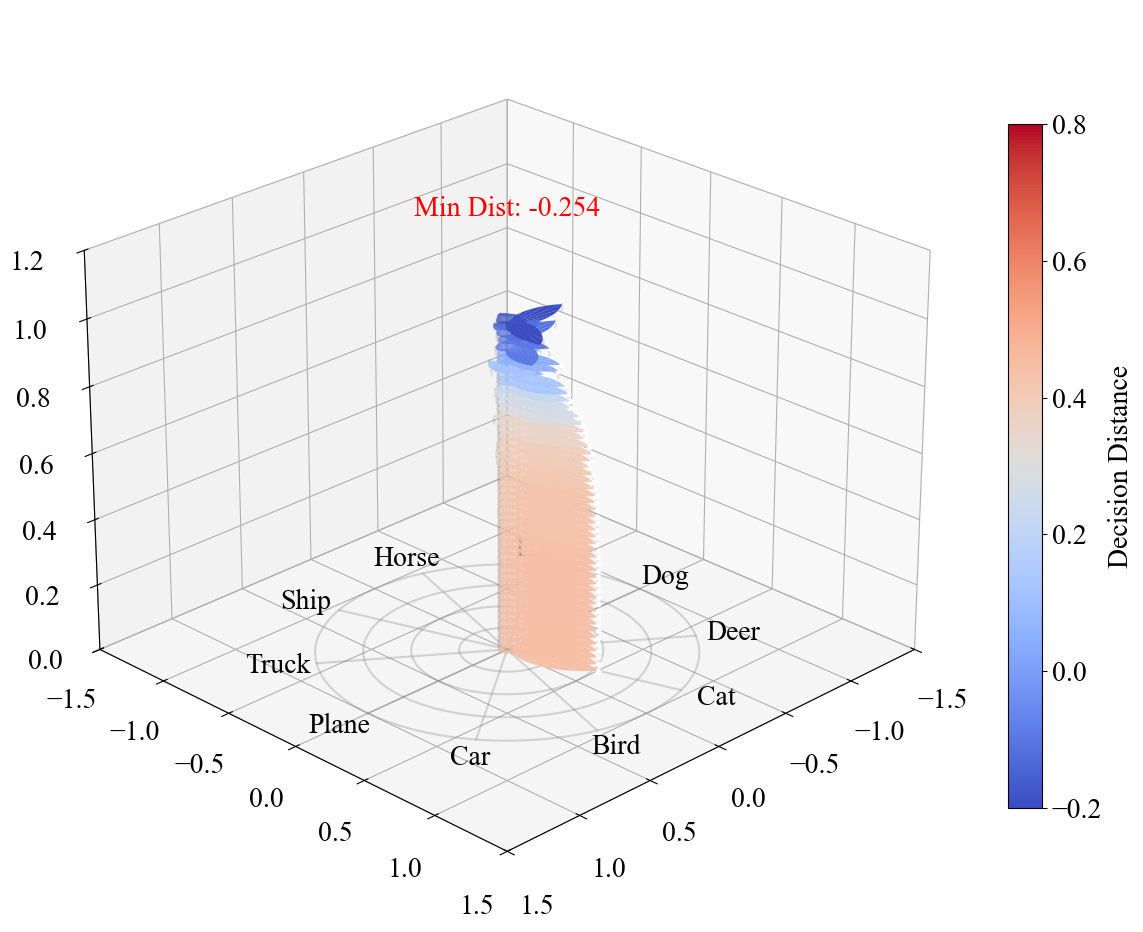

In [32]:
plot_3d_probability_mountain(teacher_data, target_class, temperature, 
                               "Teacher Model", 300, 1, "teacher_mountain.pdf")

Saved 3D visualization to student_mountain.pdf


<Axes3D: >

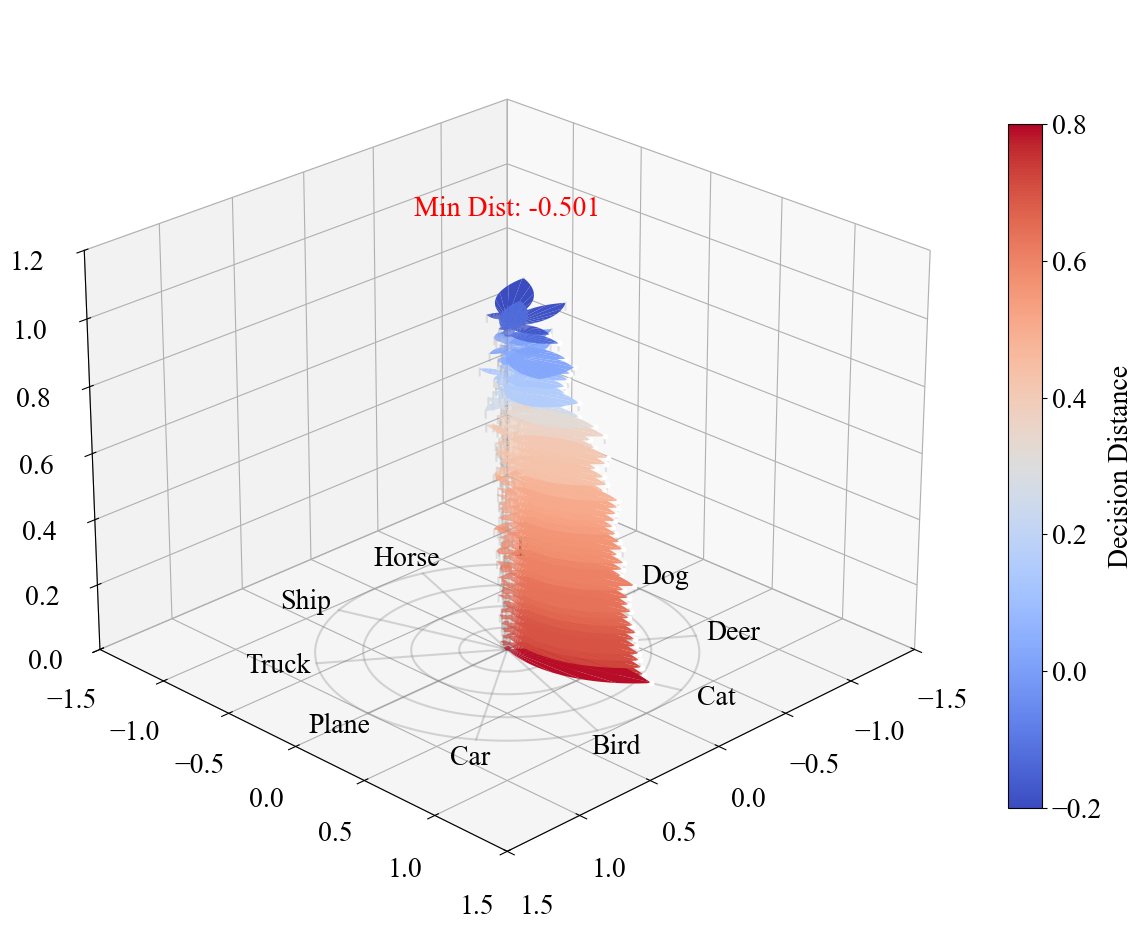

In [33]:
plot_3d_probability_mountain(student_data, target_class, temperature, 
                               "Student Model", 300, 1, "student_mountain.pdf")

# Confusion Star

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def confusion_star(y_true, y_pred, class_names=None, threshold=5, filename="confusion_star_clean.png"):
    """
    Improved Confusion Star plot in radial bar style (Luque-style) for multi-class error visualization.
    Only misclassifications are shown. Bars grouped by predicted class, color by actual class.
    """
    n_classes = len(np.unique(y_true))
    cm = confusion_matrix(y_true, y_pred)

    theta = np.linspace(0, 2 * np.pi, n_classes, endpoint=False)
    fig = plt.figure(figsize=(10, 10), dpi=150)
    ax = fig.add_subplot(111, polar=True)

    # Color palette
    colors = plt.cm.tab10(np.arange(n_classes))

    # Plot bars: Actual class color, bar position = predicted class
    for actual in range(n_classes):
        for predicted in range(n_classes):
            if actual == predicted:
                continue  # Skip correct predictions
            count = cm[actual, predicted]
            if count < threshold:
                continue  # Skip small errors to keep plot clean

            ax.bar(
                theta[predicted],
                count,
                width=2 * np.pi / n_classes * 0.8,
                bottom=0,
                color=colors[actual],
                edgecolor='black',
                alpha=0.7,
                label=f'Actual {actual}' if predicted == 0 else None  # Avoid duplicate legend
            )

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(theta)
    ax.set_xticklabels(class_names if class_names else [f"Class {i}" for i in range(n_classes)])
    ax.set_title("Confusion Star (Luque-style radial bars)", fontsize=18, pad=20)

    # Radial ticks (autoscaled based on max errors)
    max_val = cm.max()
    steps = int(np.ceil(max_val / 5))
    ax.set_yticks(np.arange(0, max_val + steps, steps))
    ax.set_yticklabels([str(x) for x in np.arange(0, max_val + steps, steps)])

    # Tweak legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title="Actual class", loc="center left", bbox_to_anchor=(1.1, 0.5))

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [91]:
def get_predictions(model, dataloader, device='mps'):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images) / 2.5  # logits
            predictions = torch.argmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    return y_true, y_pred

In [92]:
y_true_teacher, y_pred_teacher = get_predictions(teacher_model, teacher_test_loader, device=device)

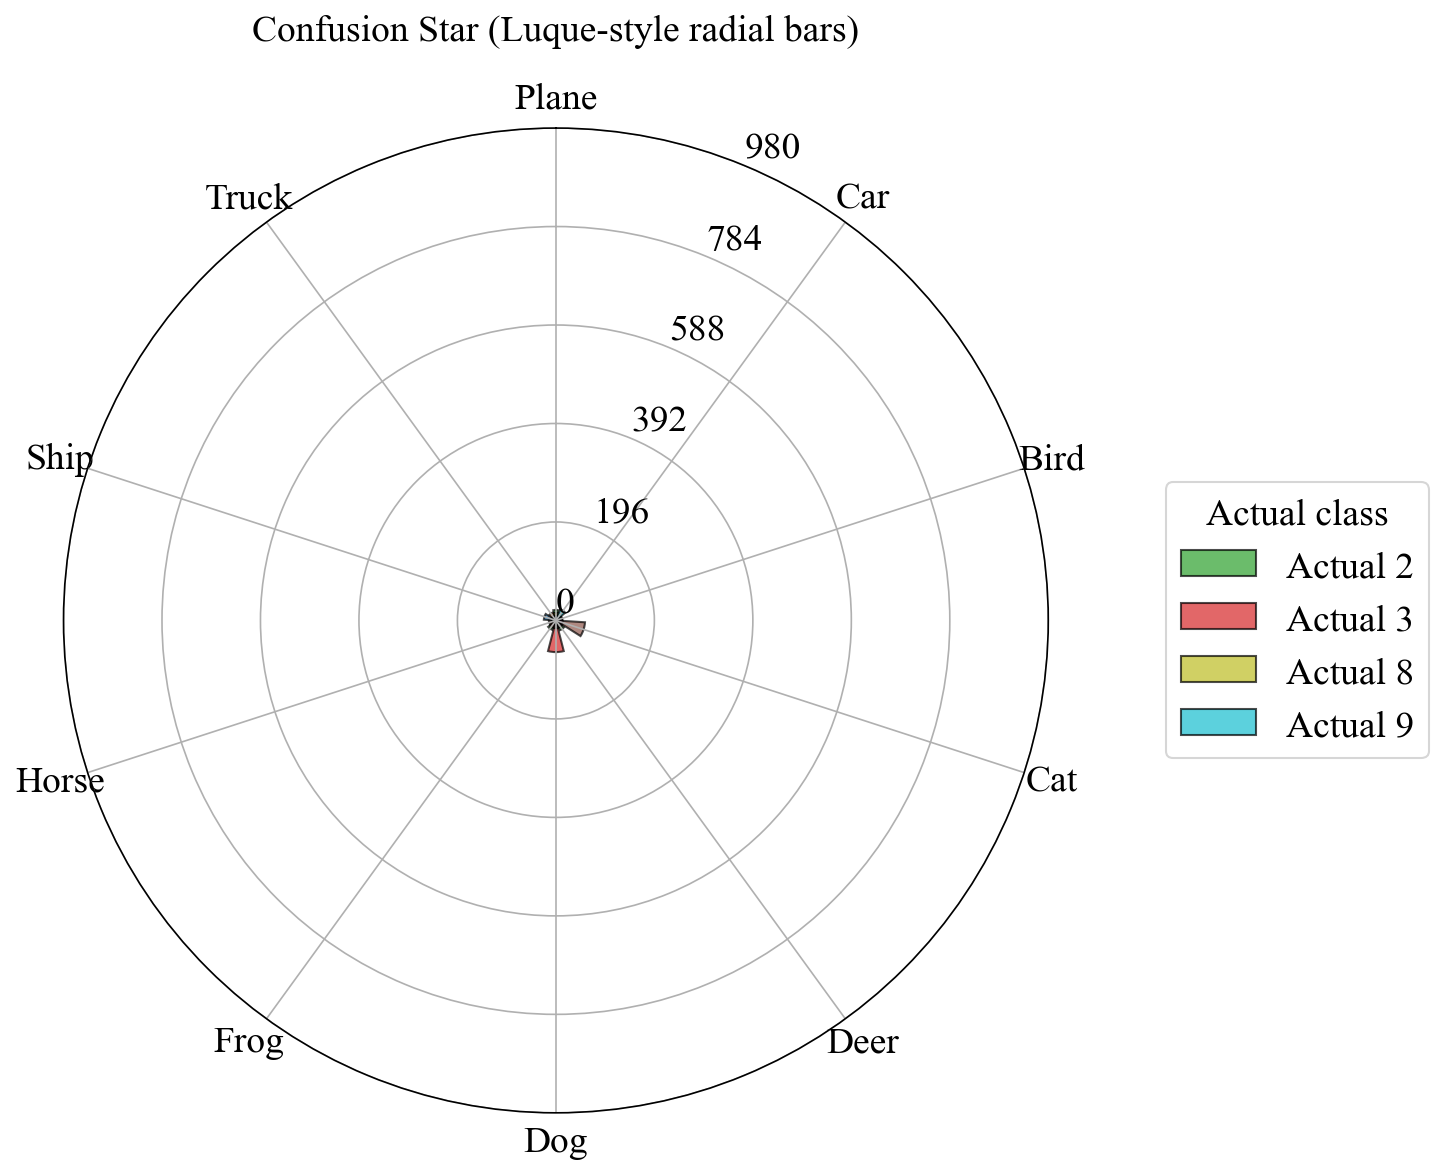

In [95]:
confusion_star(y_true_teacher, y_pred_teacher, 
               class_names=["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"], 
               filename="teacher_confusion_star.pdf")

In [ ]:
confusion_star(student_logits, labels, T=2.5, filename="viz/student_confusion_star.pdf")

# Cumulative Pixel Intensity Histogram

In [51]:
def extract_all_pixels(dataset):
        all_pixels = []
        loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

        for images, _ in tqdm(loader, desc="Extracting pixels"):
            images = images.float()
            if images.max() > 1.0:
                images /= 255.0
            images = images.view(images.size(0), -1)
            all_pixels.append(images.cpu().numpy().flatten())

        return np.concatenate(all_pixels)

In [62]:
train_pixels = extract_all_pixels(train_data)
test_pixels = extract_all_pixels(test_data)

Extracting pixels: 100%|██████████| 157/157 [00:25<00:00,  6.09it/s]


In [63]:
def plot_pixel_intensity_histogram(train_pixels, test_pixels, 
                                   bins=256, save_path=None):
    
    train_pixels /= 

    # Compute histograms (counts)
    train_hist, bin_edges = np.histogram(train_pixels, bins=bins, range=(0, 1))
    test_hist, _ = np.histogram(test_pixels, bins=bins, range=(0, 1))
    train_hist = train_hist / train_hist.sum()
    test_hist = test_hist / test_hist.sum()
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plotting bar-style histograms
    plt.rcParams['font.family'] = "Times New Roman"
    plt.rcParams['font.size'] = 18
    plt.figure(figsize=(10, 6))

    width = (bin_edges[1] - bin_edges[0]) * 0.9  # Bar width

    plt.bar(bin_centers, train_hist, width=width, alpha=0.6, color='blue', label='Training')
    plt.bar(bin_centers, test_hist, width=width, alpha=0.6, color='red', label='Test')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.xlabel('Pixel Intensity', fontsize=18)
    plt.ylabel("Normalized Pixel Count (PDF)", fontsize=18)
    plt.yscale('log')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

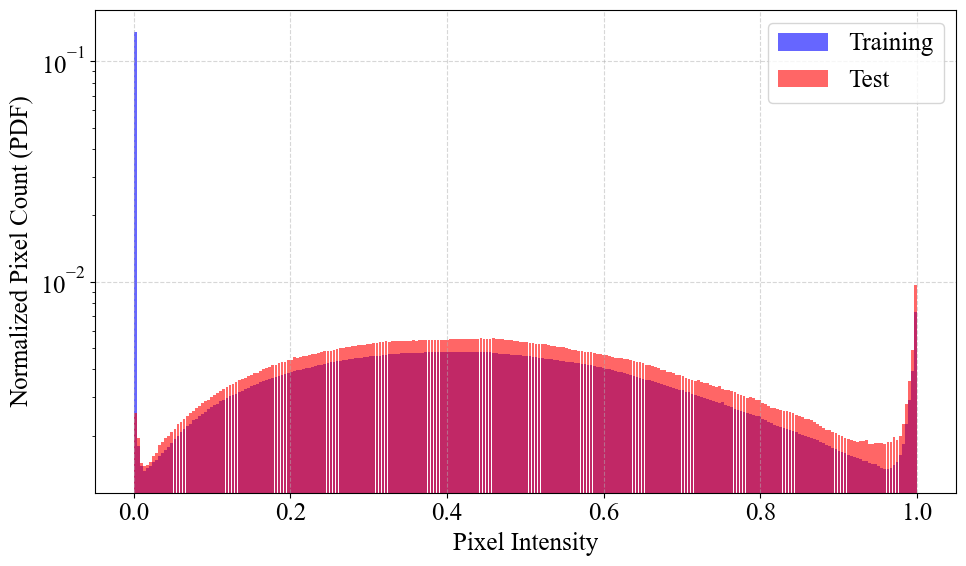

In [64]:
plot_pixel_intensity_histogram(
        train_pixels, 
        test_pixels,
        save_path="Hernandez2025_cifar10_stacked_histogram.pdf"
    )